**How much do Data Analysts earn based on their occupations and skills?**

***Methology***
* Evaluate median salary for top 6 data jobs
* Find median salary per skill for Data Analysts
* Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

***Salary Distribution by Job Title***

Filtering the data to only include salary values from France

In [2]:
# filter for the job titles and country
df_FR = df[(df['job_country'] == 'France')].dropna(subset=['salary_year_avg'])

In [3]:
# Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.
job_titles = df_FR['job_title_short'].value_counts().index[:5].tolist()

# filter the df for the top 6 job titles
df_FR_top5 = df_FR[df_FR['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_FR_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Senior Data Engineer']

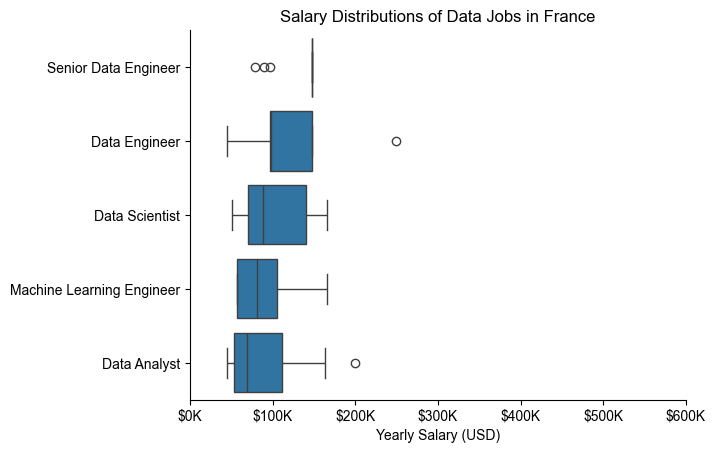

In [4]:
# Plot the top 5 job titles salary distributions using a box plot.
sns.boxplot(data=df_FR_top5, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in France')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

**Investigate Median Salary Vs Skill for Data Analysts**

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'France', to create a new DataFrame df_DA_FR. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the salary_year_avg and job_skills columns

In [5]:
# Only get data analyst jobs in the US
df_DA_FR = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'France')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_FR = df_DA_FR.dropna(subset=['salary_year_avg'])

df_DA_FR = df_DA_FR.explode('job_skills')

df_DA_FR[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
12526,111175.0,power bi
12526,111175.0,sharepoint
12526,111175.0,excel
33317,56700.0,scala
33317,56700.0,sql


**Determine The Highest Paid Skills and Most Demanded Skills**

Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the df_DA_FR. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame (df_DA_top_pay) with a reset index and a renamed salary column labeled 'median_salary'.

In [6]:
df_DA_top_pay = df_DA_FR.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
c,1,200000.0
gitlab,1,163782.0
terraform,1,163782.0
bigquery,3,111175.0
nosql,1,111175.0
php,1,111175.0
vba,3,111175.0
sharepoint,1,111175.0
kafka,3,111175.0


Calculates the count and median salary for each skill in df_DA_FR. It groups the data by job_skills, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [7]:
df_DA_skills = df_DA_FR.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
excel,8,96012.5
python,20,94800.0
power bi,8,92925.0
sql,28,89100.0
aws,5,89100.0
snowflake,5,89100.0
spark,5,80850.0
azure,9,80850.0
airflow,5,57500.0


Creates two horizontal bar charts:

- Displays the highest paid skills
- Shows the most in demand skills

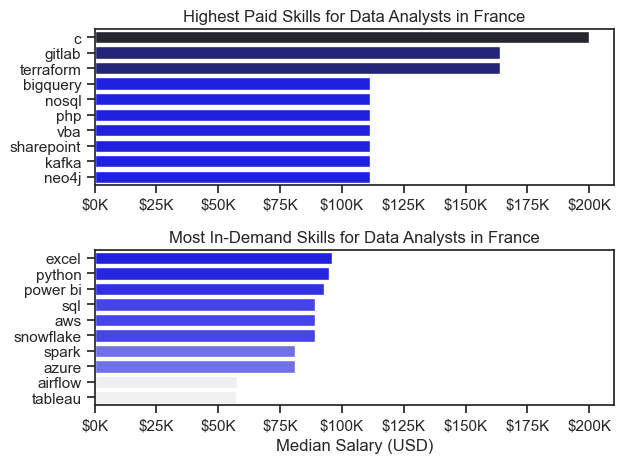

In [11]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:blue_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in France')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:blue')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in France')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()